Iteration 0, xkwk = [40  9 74 46  9]
Iteration 1 xkwk = [ 0.50164742  0.66936748 20.80941393 13.32077485  3.40408077]
Iteration 2 xkwk = [0.98351439 0.63510485 0.58974353 1.49001134 1.30162589]
Iteration 3 xkwk = [0.52286013 0.38192016 0.50053222 0.51244519 0.5822423 ]
Iteration 4 xkwk = [0.25084278 0.24332917 0.25515652 0.24227342 0.25839811]
Iteration 5 xkwk = [0.12490198 0.12337567 0.12538203 0.12522631 0.12611401]
Iteration 6 xkwk = [0.06249926 0.06201158 0.06257758 0.06258861 0.06282297]
Iteration 7 xkwk = [0.03125002 0.03112786 0.03127033 0.03127037 0.03133142]
Iteration 8 xkwk = [0.015625   0.01559448 0.01563009 0.01563009 0.01564535]
Iteration 9 xkwk = [0.0078125  0.00780487 0.00781377 0.00781377 0.00781759]
Iteration 10 xkwk = [0.00390625 0.00390434 0.00390657 0.00390657 0.00390752]


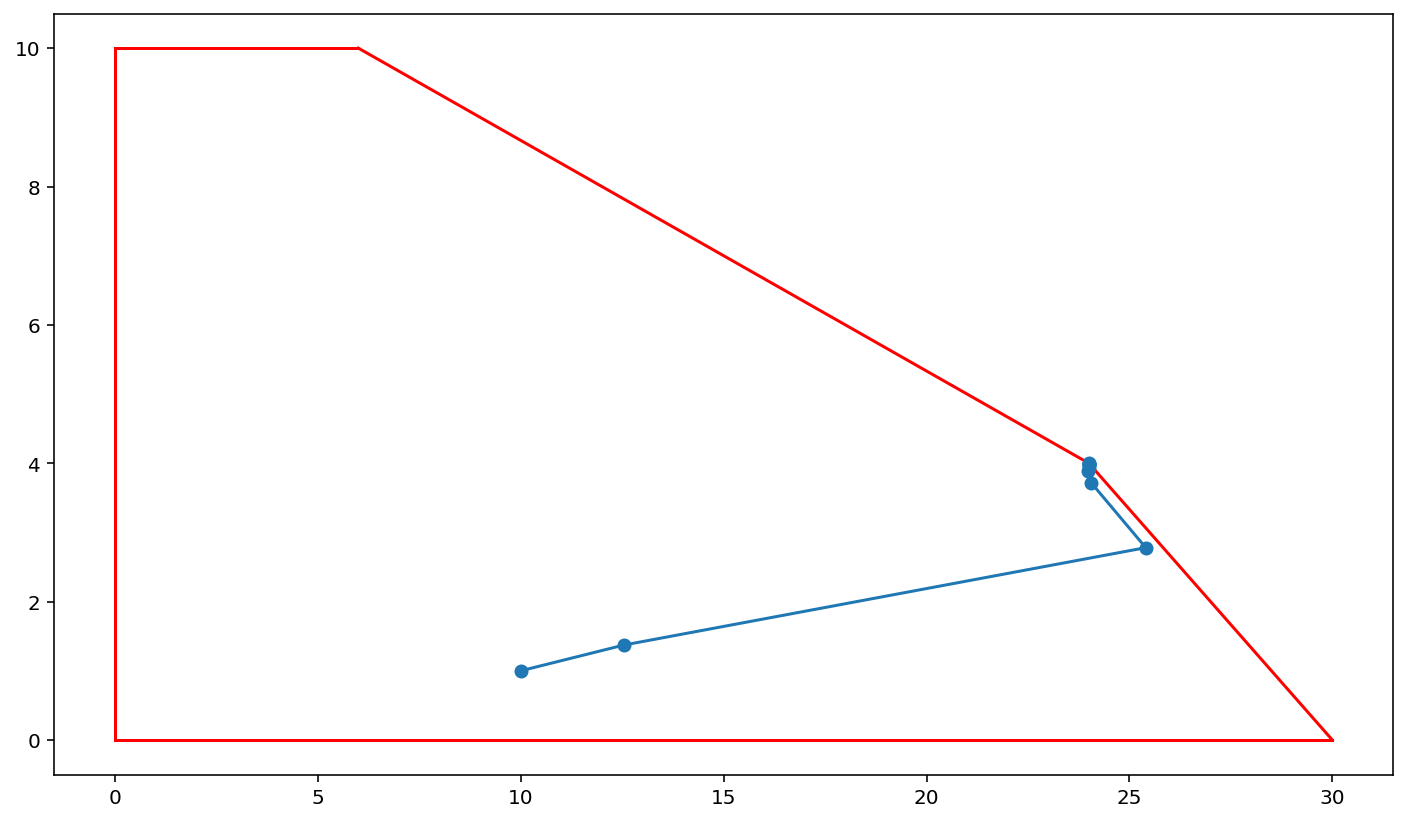

In [38]:
import numpy as np
import matplotlib.pyplot as plt

c = np.array([2,4,0,0,0]) # objective gradient including slack
A = np.array([[4,6,1,0,0], # constraint matrix including slack
              [2,6,0,1,0],
              [0,1,0,0,1]])
# notice b is not needed (implicit in the x solution and constraint matrix)

beta = 0.99 # how far along max step size to go (can't go all the way or we introduce zeros)
mu = 2 # initial target for xk*wk
theta = 0.5 # how much to reduce mu by each time (mu is the target value of xk*wk, thus we start by aiming for xk*wk = 2 and cut it by half each iteration)

# initial guesses
x = np.array([10,1,74,46,9]) # fully feasible primal
y = np.array([1,1,1]) # feasible y
w = np.array([4,9,1,1,1]) # associated surplus in dual

numIters = 10 # hard coding number of iterations (a real algorithm would have a stopping criterion)

xArray = np.zeros((2,numIters+1)) # for plotting
xArray[:,0] = x[0:2] # record initial x

print("Iteration 0, xkwk =",x*w)

for i in range(numIters):
    X = np.diag(x) # construct X matrix
    W = np.diag(w) # construct W matrix
    Winv = np.diag(1/w) # construct W^-1 matrix
    e = np.ones(len(x))
    
    v = mu*e - X @ W @ e # vector v
    
    # dy found by system solve B dy = z where B = A W^-1 X A^T and z = A W^-1 v
    B = A @ Winv @ X @ np.transpose(A) # LHS of system for dy
    z = A @ Winv @ v # RHS of system for dy
    
    # find update directions
    dy = np.linalg.solve(B,z)
    dw = np.transpose(A) @ dy
    dx = Winv @ (v - X @ dw)
    
    # find max stepsizes
    alphaPrimal = np.min([1,beta*np.min(x[dx<0]/-dx[dx<0])]) # ratio test checking only decreasing x values
    alphaDual = np.min([1,beta*np.min(w[dw<0]/-dw[dw<0])]) # ratio test checking only decreasing w values
    
    # update step
    x = x + alphaPrimal*dx
    y = y + alphaDual*dy
    w = w + alphaDual*dw
    
    # aim for smaller xk*wk next iteration
    mu = mu*theta
    
    # print current xkwk (optimality occurs when these are all 0)
    print("Iteration",i+1,"xkwk =",x*w)
    
    # save current value
    xArray[:,i+1] = x[0:2]

# manually plot the simplex feasible region
plt.plot([0,6],[10,10],'r')
plt.plot([0,0],[0,10],'r')
plt.plot([0,30],[0,0],'r')
plt.plot([24,30],[4,0],'r')
plt.plot([24,6],[4,10],'r')

# plot the path of the interior point algorithm
plt.plot(xArray[0,:],xArray[1,:],'-o')